# Hanan Basheer (20B030018)
## Assignment 2

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.integrate import odeint
import numpy as np
from math import *

## Part 1

In [20]:
def vel(r, t = 0):
    x, y = r
    x0 = 0.5
    q = 1
    
    rad = sqrt((x + x0)**2 + y**2)
    rad2 = sqrt((x - x0)**2 + y**2)
    u1 = (x + x0) / (rad**2)
    v1 = y / (rad**2)
    u2 = (x - x0) / (rad2**2)
    v2 = y / (rad2**2)
    if rad >= 0.25 and rad2 >= 0.25:
        return [(0.5 / pi) * (q * u1 - q * u2), (0.5 / pi) * (q * v1 - q * v2)]
    else:
        return [0, 0]

### Q.1) Quiver Plot

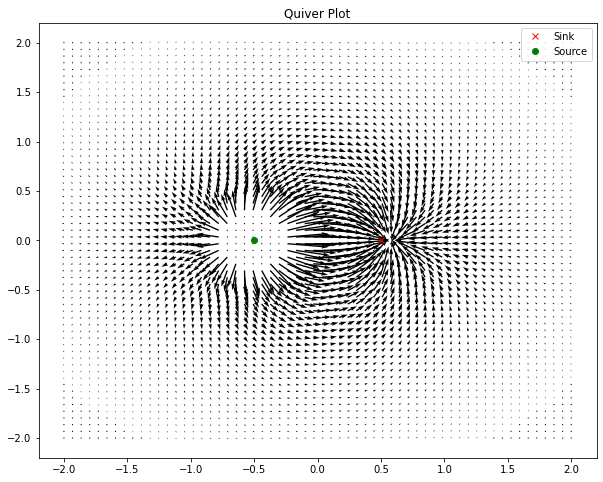

In [21]:
x, y = np.mgrid[-2:2:60j, -2:2:60j]
u, v = np.zeros_like(x), np.zeros_like(y)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        u[i][j], v[i][j] = vel((x[i][j], y[i][j]))

plt.figure(figsize = (10, 8))
plt.quiver(x, y, u, v)
plt.title('Quiver Plot')
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])

### Q.2) Potential Lines

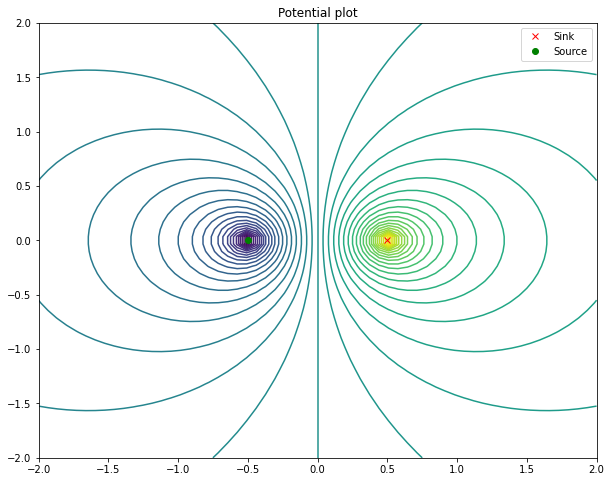

In [22]:
def phi(r, t = 0):
    x, y = r
    x0 = 0.5
    q = 1

    return [q * log(sqrt((x + x0)**2 + y**2)) / (2 * pi), q * log(sqrt((x - x0)**2 + y**2)) / (2 * pi)]

u, v = np.zeros_like(x), np.zeros_like(y)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        u[i][j], v[i][j] = phi((x[i][j], y[i][j]))

plt.figure(figsize = (10, 8))
plt.contour(x, y, u - v, levels = 50)
plt.title('Potential plot')
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])

### Q.3) Streamlines

Text(0.5, 1.0, 'Streamline Odeint Plot')

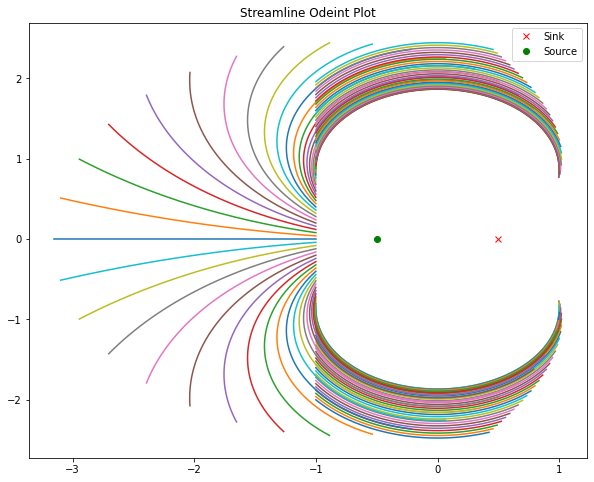

In [23]:
times = np.linspace(0, 60, 100)
plt.figure(figsize = (10, 8))
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])
for i in range(100):
    ic = np.array([-1, -2 + i * (0.04)]) 
    sol = odeint(vel, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)

plt.title('Streamline Odeint Plot')

### Q.4) Streamlines superimposed by Potential Lines

Text(0.5, 1.0, 'Streamlines superimposed by Potential Lines')

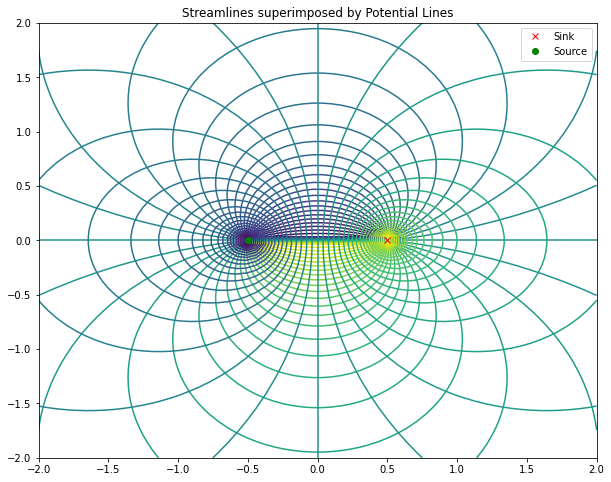

In [24]:
def phi_streamline(r, t = 0):
    x, y = r
    q = 1
    return [(0.5 / pi) * q * atan2(y, (x + 0.5)), (0.5 / pi) * q * atan2(y, (x - 0.5))]

times = np.linspace(0, 60, 100)
plt.figure(figsize = (10, 8))
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])

u2, v2 = np.zeros_like(x), np.zeros_like(y)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        u2[i][j], v2[i][j] = phi_streamline((x[i][j], y[i][j]))

plt.contour(x, y, u2 - v2, levels = 50)
plt.contour(x, y, u - v, levels = 50)
plt.xlim([-2, 2])
plt.title('Streamlines superimposed by Potential Lines')

## Part 2 (Free stream)

In [25]:
def vel(r, t = 0):
    x, y = r
    x0 = 0.5
    q = 1
    u_inf = 1
    
    rad = sqrt((x + x0)**2 + y**2)
    rad2 = sqrt((x - x0)**2 + y**2)
    u1 = (x + x0) / (rad**2)
    v1 = y / (rad**2)
    u2 = (x - x0) / (rad2**2)
    v2 = y / (rad2**2)
    if rad >= 0.25 and rad2 >= 0.25:
        return [(0.5 / pi) * (q * u1 - q * u2) + u_inf, (0.5 / pi) * (q * v1 - q * v2)]
    else:
        return [0, 0]

### Q.1) Potential Lines

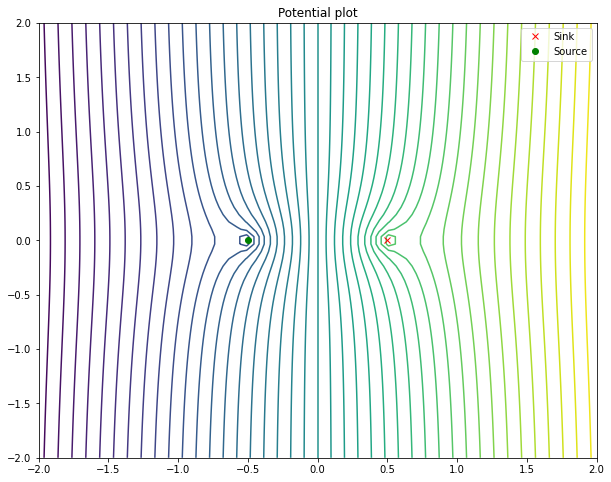

In [26]:
def phi(r, t = 0):
    x, y = r
    x0 = 0.5
    q = 1
    u_inf = 1

    return u_inf * x + ((0.25 / pi)) * (log((x + 0.5)**2 + y**2) - log((x - 0.5)**2 + y**2))

x, y = np.mgrid[-2:2:60j, -2:2:60j]
z = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i][j] = phi((x[i][j], y[i][j]))

plt.figure(figsize = (10, 8))
plt.contour(x, y, z, levels = 50)
plt.title('Potential plot')
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])

### Q.2) Streamlines

(-1.0, 1.0)

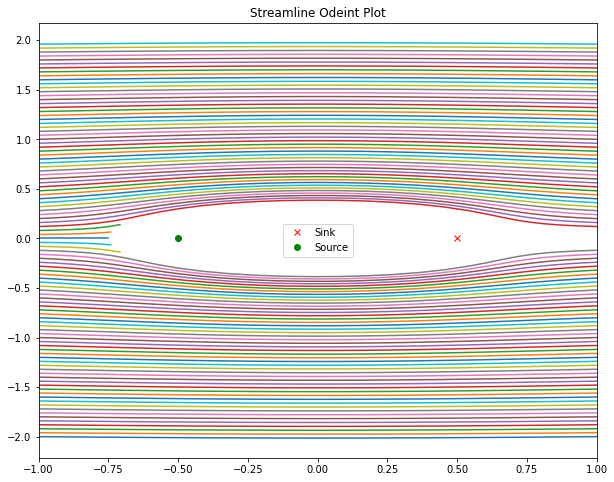

In [27]:
times = np.linspace(0, 7, 100)
plt.figure(figsize = (10, 8))
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])
for i in range(100):
    ic = np.array([-1, -2 + i * (0.04)]) 
    sol = odeint(vel, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)

plt.title('Streamline Odeint Plot')
plt.xlim(-1, 1)

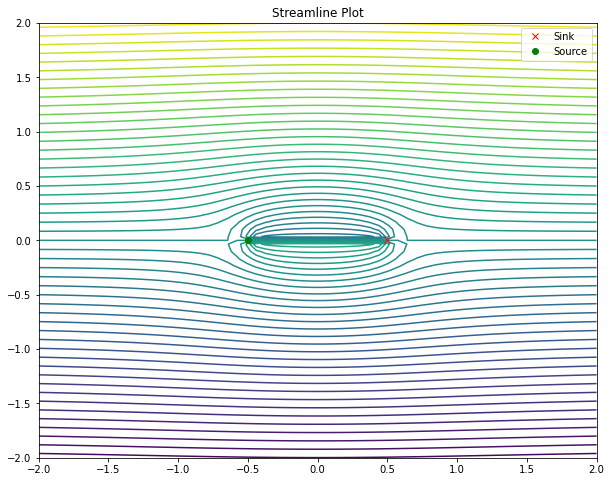

In [28]:
def phi_streamline(r, t = 0):
    x, y = r
    x0 = 0.5
    q = 1
    u_inf = 1

    return (0.5 / pi) * q * atan2(y, (x + 0.5)) - (0.5 / pi) * q * atan2(y, (x - 0.5)) + u_inf * y
    
z2 = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z2[i][j] = phi_streamline((x[i][j], y[i][j]))

plt.figure(figsize = (10, 8))
plt.contour(x, y, z2, levels = 50)
plt.title('Streamline Plot')
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])

### Q.3) Pressure Plot

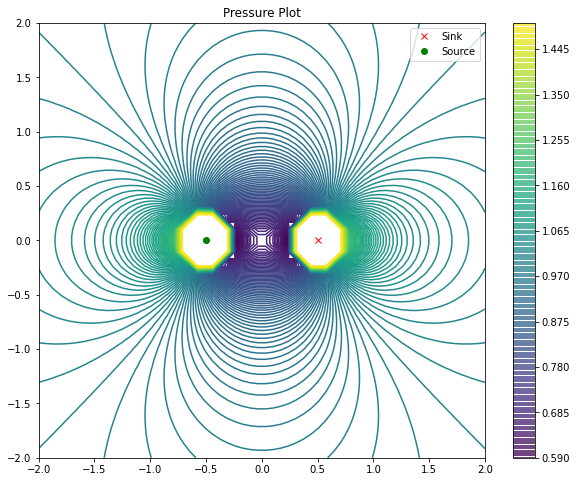

In [29]:
def pressure(r, t = 0):
    ro_inf = 1
    
    x, y = r
    u, v = vel((x, y))
    return (ro_inf / 2) * (3 - sqrt(u**2 + v**2))

p = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        p[i][j] = pressure((x[i][j], y[i][j]))

plt.figure(figsize = (10, 8))
plt.contour(x, y, p, levels = 200)
plt.title('Pressure Plot')
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])
plt.colorbar()

### Q.4) Velocity Plot

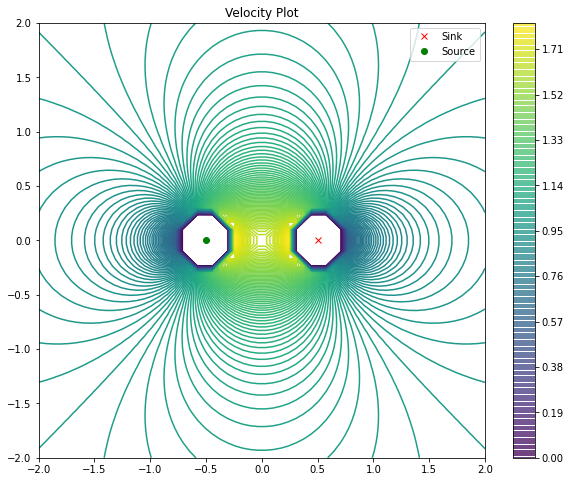

In [30]:
def velocity(r, t = 0):
    x, y = r
    u, v = vel((x, y))
    return sqrt(u**2 + v**2)

velocities = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        velocities[i][j] = velocity((x[i][j], y[i][j]))

plt.figure(figsize = (10, 8))
plt.contour(x, y, velocities, levels = 200)
plt.title('Velocity Plot')
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.legend(['Sink', 'Source'])
plt.colorbar()

In [31]:
x_loc, y_loc = np.unravel_index(velocities.argmax(), velocities.shape)
x_loc, y_loc = x[x_loc, y_loc], y[x_loc, y_loc]
print("Maximum velocity is", velocities.max(), "at (", x_loc, ",", y_loc, ")")
x2, y2 = np.unravel_index(velocities.argmin(), velocities.shape)
x2, y2 = x[x2,y2], y[x2,y2]
print("Minimum velocity is", velocities.min(), "at (", x_loc, ",", y_loc, ")")

Maximum velocity is 1.8125425346806388 at ( -0.23728813559322037 , -0.03389830508474567 )
Minimum velocity is 0.0 at ( -0.23728813559322037 , -0.03389830508474567 )


### Q.5) Various values of Source and Sink 

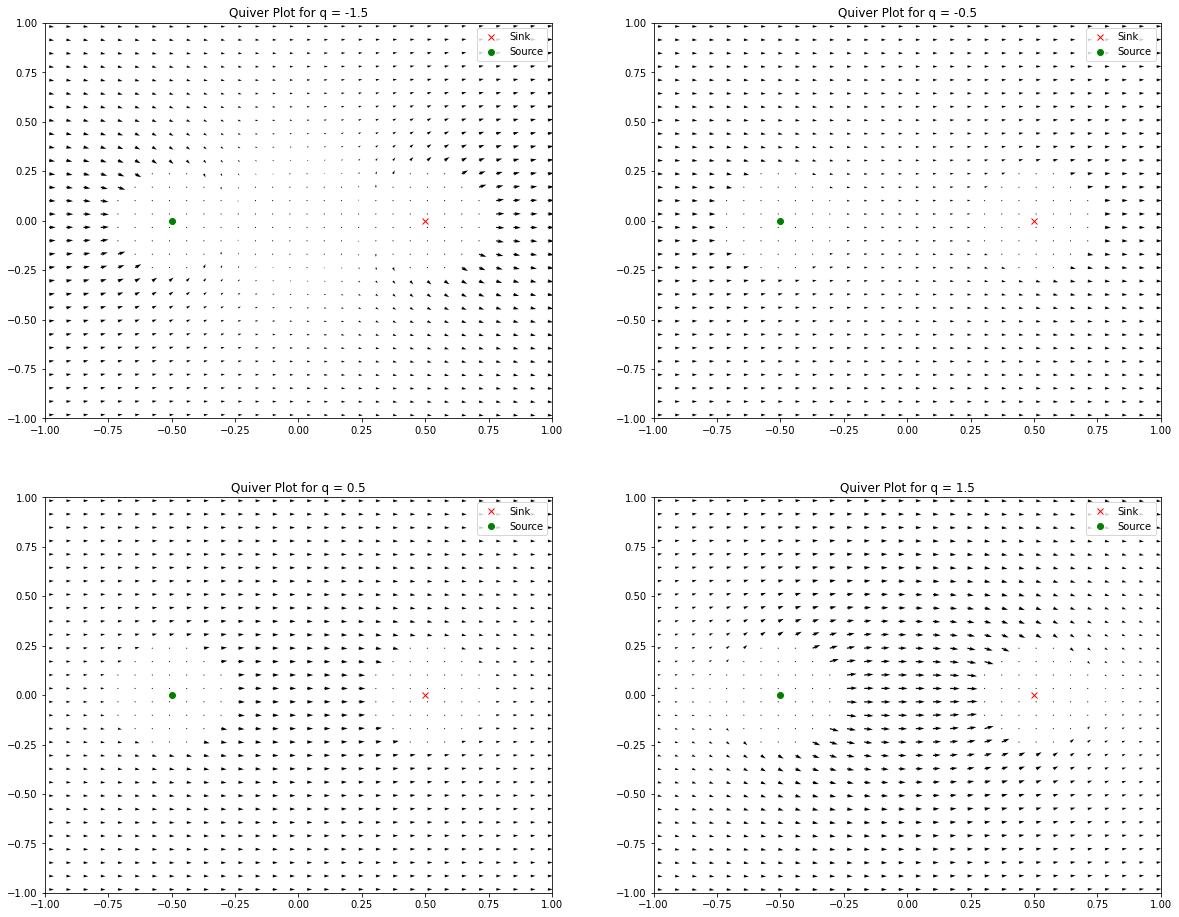

In [32]:
def vel_q(r, q, t = 0):
    x, y = r
    x = float(x)
    y = float(y)
    x0 = 0.5
    u_inf = 1
    
    rad = sqrt((x + x0)**2 + y**2)
    rad2 = sqrt((x - x0)**2 + y**2)
    u1 = (x + x0) / (rad**2)
    v1 = y / (rad**2)
    u2 = (x - x0) / (rad2**2)
    v2 = y / (rad2**2)
    if rad >= 0.25 and rad2 >= 0.25:
        return [(0.5 / pi) * (q * u1 - q * u2) + u_inf, (0.5 / pi) * (q * v1 - q * v2)]
    else:
        return [0, 0]

subplt = plt.figure(figsize = (20,16))
pos = 1
for q in [-1.5, -0.5, 0.5, 1.5]:
    subplt.add_subplot(2, 2, pos)
    u, v = np.zeros_like(x), np.zeros_like(y)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            u[i,j], v[i,j] = vel_q((x[i,j], y[i,j]), q)
    
    plt.quiver(x,y,u,v)
    plt.title('Quiver Plot for q = ' + str(q))
    plt.plot([0.5], [0], 'rx')
    plt.plot([-0.5], [0], 'go')
    plt.legend(['Sink', 'Source'])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    pos += 1

## Part 3

### Q.1) Velocity Doublet

Text(0.5, 1.0, 'Velocity Plot')

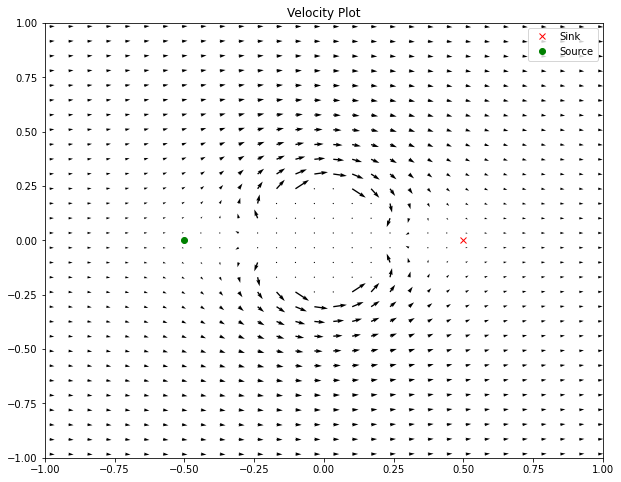

In [33]:
def velocity_doublet(r, t = 0):
    x, y = r
    mu = 1
    u_inf = 1
    r = sqrt(x**2 + y**2)
    u = u_inf + mu * (y**2 - x**2) / (2 * pi * (r**4))
    v = - mu * (2 * x * y) / (2 * pi * (r**4))
    return u, v

x, y = np.mgrid[-2:2:60j,-2:2:60j]
u, v = np.zeros_like(x), np.zeros_like(y)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if (x[i, j])**2 + (y[i, j])**2 > 0.25**2:
            u[i,j], v[i,j] = velocity_doublet((x[i,j], y[i,j]))

plt.figure(figsize = (10, 8))
plt.quiver(x, y, u, v)
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend(['Sink', 'Source'])
plt.title('Velocity Plot')

### Q.2) Potential Doublet

Locator attempting to generate 8175 ticks ([-1021.75, ..., 1021.75]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Potential Plot')

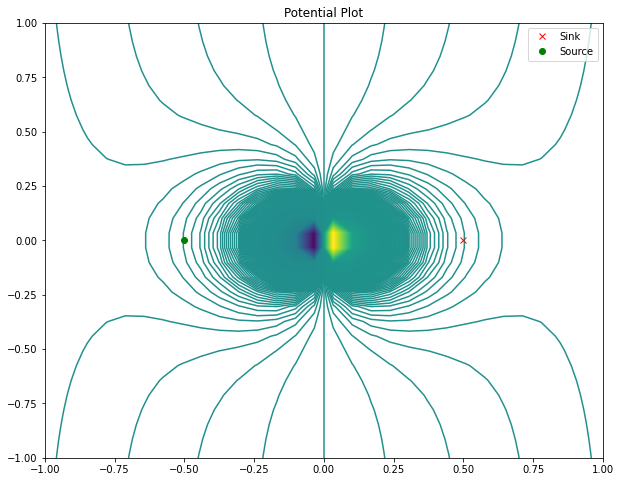

In [17]:
def phi_doublet(r, t = 0):
    x, y = r
    mu = 1
    u_inf = 1









































































































































































    
    r = sqrt(x**2 + y**2)
    return ((mu * x) / (2 * pi * (r**4))) + u_inf * x

x, y = np.mgrid[-2:2:60j,-2:2:60j]
z_phi = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z_phi[i,j] = phi_doublet((x[i,j], y[i,j]))

plt.figure(figsize = (10, 8))
plt.contour(x, y, z_phi, levels = 10000)
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend(['Sink', 'Source'])
plt.title('Potential Plot')

### Q.3) Streamfunction Doublet

Locator attempting to generate 8175 ticks ([-1021.75, ..., 1021.75]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Streamfunction Plot')

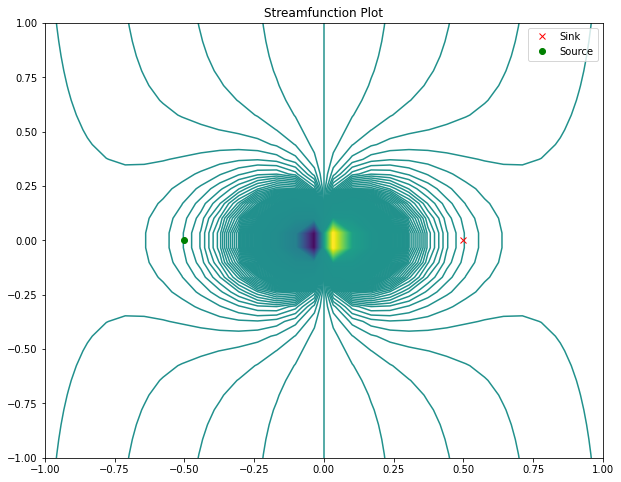

In [18]:
def psi_doublet(r, t = 0):
    x, y = r
    mu = 1
    u_inf = 1
    r = sqrt(x**2 + y**2)
    return ((-mu * y) / (2 * pi * (r**4))) + u_inf * y

z_psi = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z_psi[i,j] = phi_doublet((x[i,j], y[i,j]))

plt.figure(figsize = (10, 8))
plt.contour(x, y, z_psi, levels = 10000)
plt.plot([0.5], [0], 'rx')
plt.plot([-0.5], [0], 'go')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend(['Sink', 'Source'])
plt.title('Streamfunction Plot')